# 04: Visualizations

## Objective: 
In this lesson, you will learn how to create and read simple visual charts that turn raw numbers into clear pictures. 

<table width="100%">
  <tr>
    <td style="vertical-align: top; text-align: left; width: 60%; padding-right: 20px;"> </br> </br></br> </br></br>
    <strong>You'll Build:</strong>
      <ol style="font-size: 18px; line-height: 1.4;">
        <li><strong>Histograms:</strong> to see how often different scores occur  </li>
        <li><strong>Box plots:</strong> to spot unusually high or low values and compare groups  </li>
        <li><strong>Scatter plots:</strong> to see if two measurements move together (for example, Age vs.  Recidivism Score) </li>
        <li><strong>Heatmaps:</strong> to quickly identify which pairs of variables tend to rise and fall in sync  </li>
      </ol>
    </td>
    <td style="vertical-align: top; text-align: left; width: 40%;">
   <!-- relative path to visualizations.png -->
      <img src="../slides/visualizations.png" alt="data vis" width="1000" />
    </td>
  </tr>
</table>

#### By the end, you’ll be able to describe in plain language what each chart shows—how your data are distributed, where patterns emerge, and which factors appear linked—even if you’ve never worked with data before. 
---
<audio controls src="../audio/Visualization.m4a">

---

### Creating Key Charts

In this lesson you’ll learn how to turn numbers into pictures. We’ll use four chart types—histograms, box plots, scatter plots, and heatmaps—to explore our recidivism dataset. Each section includes:

1. **What we’re doing** in plain English  
2. **Python code** to run  
3. **What you’ll see** and **what it means**  

---

## 1. Histogram  
**What we’re doing:**  
The first visualization we will explore is the histogram. Here we’ll draw bars that show how many people fall into each score range. This helps you see if scores cluster around a central value or spread out evenly.


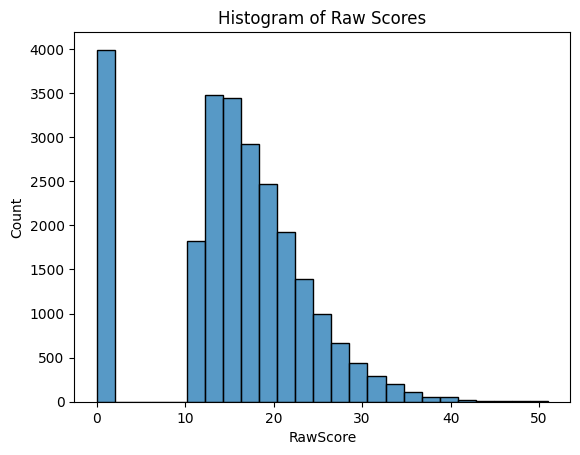

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df = pd.read_csv("../data/compas_scores_raw.csv")
plt.figure()
sns.histplot(df["RawScore"], binwidth=2, edgecolor="black")
plt.title("Histogram of Raw Scores")
plt.xlabel("RawScore")
plt.ylabel("Count")
plt.show()

#### Histogram of Raw Scores

We’ll walk through how to read the histogram you just created. Even if you’ve never worked with data before, this step-by-step guide will clarify what each part of the Python code is doing and what the resulting chart tells you.

---

#### `import matplotlib.pyplot as plt`  
- Loads Matplotlib’s plotting functions under the name `plt`  
- Matplotlib is a core Python library for creating charts and graphs

#### `import seaborn as sns`  
- Loads Seaborn under the name `sns`  
- Seaborn builds on Matplotlib to make statistical plots easier and prettier

---

#### `plt.figure()`  
- Starts a fresh plotting area so your histogram isn’t drawn over any older charts

#### `sns.histplot(df["RawScore"], binwidth=2, edgecolor="black")`  
- Draws the bars for your histogram  
- **`binwidth=2`** groups scores into buckets of 2 points each  
- **`edgecolor="black"`** adds a black border around each bar for clarity

#### `plt.title("Histogram of Raw Scores")`, `plt.xlabel("RawScore")`, `plt.ylabel("Count")`  
- Adds a clear **title** so you know what the chart shows  
- Labels the **x-axis** (`RawScore`) and **y-axis** (`Count`) so anyone can read the axes without guessing

#### `plt.show()`  
- Displays the completed chart on your screen

---

By understanding each line, you’ll know exactly how your histogram is built and what it reveals about how often different RawScore values occur. Tall bars show common score ranges; long tails highlight rare, extreme values.


#### Interpreting the Chart
- **Vertical bars** represent how many individuals scored within each 2-point range.

- **Height of a bar** = number of records in that score bracket.

- The **tallest bar** is the “peak,” showing the most common score range.

- The **tails** (short bars stretching left or right) show rare, extreme scores.

- If one tail is much longer, your data are **skewed** (more extreme values on that side).

This visual helps you instantly see where most scores cluster and whether there are unusual low or high values you should investigate further.

---
## 2. Box Plot

**What we’re doing:**
 - Compute the 1st quartile (Q1, 25th percentile) and 3rd quartile (Q3, 75th percentile)
 - Draw a box from Q1 to Q3 to show the middle 50% of scores (the interquartile range, IQR)
 - Place a line inside the box at the median (50th percentile)
 - Extend “whiskers” from the box to the smallest and largest scores within 1.5 × IQR
 - Plot any scores beyond the whiskers as individual dots (outliers)

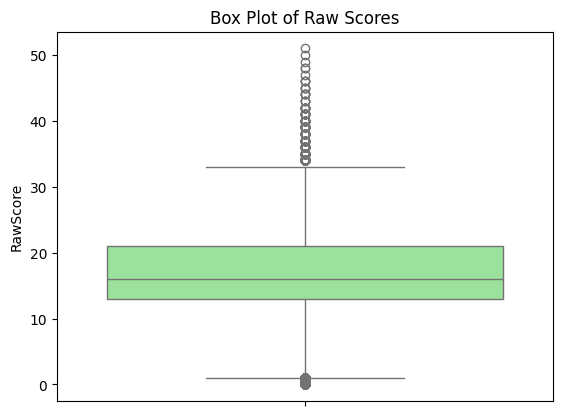

In [2]:
plt.figure()
sns.boxplot(y = df["RawScore"], color="lightgreen")
plt.title("Box Plot of Raw Scores")
plt.ylabel("RawScore")
plt.show()

---

###  Box Plot of Raw Scores

We’ll walk through how to read the box plot you just created. Even if you’ve never worked with data before, this step-by-step guide will clarify exactly what each part of the Python code is doing and what the resulting chart tells you.

#### `plt.figure()`
- Starts a fresh plotting area so your box plot isn’t drawn on any previous charts.

#### `sns.boxplot(y = df["RawScore"], color="lightgreen")`
- Draws a vertical box representing your `RawScore` distribution:

- The **box** covers the middle 50% of scores (from the 25th to the 75th percentile).

- The **line** inside the box marks the median (the value that splits the data in half).

- The **whiskers** extend to the lowest and highest scores that aren’t extreme outliers.

- Any dots beyond the whiskers are **outliers**—scores that are unusually low or high.

- **`color="lightgreen"`** fills the box with a light green shade.

#### `plt.title("Box Plot of Raw Scores")`
- Adds a clear **title** so you know what the chart represents.

#### `plt.ylabel("RawScore")`
- Labels the **`y-axis`** with `RawScore`.

- (No x-axis label is needed since there’s only one category.)

#### plt.show()
- Renders the chart on your screen.

### Interpreting the plot
- The **height of the box** shows how spread out the middle half of your scores are.
- A **short box** means most scores are close together; a tall box means they vary more.
- The **line** inside the box tells you the median score.
- **Whiskers** reveal the typical low and high range of scores.
- **Outlier** dots flag any unusually extreme values you may want to investigate further.


---

### 3. Scatter Plot

**What we’re doing**  
We’ll draw one dot for each person in our dataset. The dot’s horizontal position shows their **Age**, and the vertical position shows their **RawScore**. This helps us see if older or younger people tend to score higher or lower.

**Using a sample**  
Plotting all 60,000+ data points would create a crowded chart and could actually obscure the trends we’re interested in. To keep the scatterplot clear and ensure any patterns stand out, we’ll use a random sample of 200 observations from the original dataset.



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("../data/compas_sample_new.csv")
plt.figure()  
sns.scatterplot(
  x = df["Age"], 
  y = df["RawScore"], 
  alpha = 0.3  # makes points semi-transparent to see overlapping dots
)
plt.title("Scatter: Age vs RawScore")  
plt.xlabel("Age (years)")                
plt.ylabel("RawScore")                   
plt.show()                                


FileNotFoundError: [Errno 2] No such file or directory: '../data/compas_sample_new.csv'

---

### Scatter Plot of Age vs RawScore

We’ll walk through how to read the scatter plot you just created. Even if you’ve never worked with data before, this step-by-step guide will clarify exactly what each part of the Python code is doing and what the resulting chart tells you.

#### `import matplotlib.pyplot as plt`
- Loads Matplotlib’s plotting functions under the name `plt`.  
- Matplotlib is a core library for creating all kinds of charts in Python.

#### `import seaborn as sns`
- Loads Seaborn under the name `sns`.  
- Seaborn builds on Matplotlib to make statistical plots easier and prettier.

#### `import pandas as pd`
- Loads pandas under the name `pd`.  
- pandas lets us read and manipulate tables of data (DataFrames).

#### `df = pd.read_csv("../data/compas_sample_new.csv")`
- Reads your CSV file into a DataFrame called `df`.  
- Now `df` holds all your sample rows and columns for plotting.

#### `plt.figure()`
- Starts a fresh plotting area so your scatter plot isn’t drawn over any previous charts.

#### `sns.scatterplot(x = df["Age"], y = df["RawScore"], alpha = 0.3)`
- **`x = df["Age"]`** maps the Age values to the horizontal axis.  
- **`y = df["RawScore"]`** maps the RawScore values to the vertical axis.  
- **`alpha = 0.3`** makes each dot semi-transparent so you can see overlapping points more clearly.

#### `plt.title("Scatter: Age vs RawScore")`
- Adds a clear **title** so you know this chart shows “Age vs RawScore.”

#### `plt.xlabel("Age (years)")`
- Labels the **x-axis** with “Age (years).”

#### `plt.ylabel("RawScore")`
- Labels the **y-axis** with “RawScore.”

#### `plt.show()`
- Renders the completed chart on your screen.

---

### Interpreting the Plot
- You’ll see a **cloud of dots**, one dot for each person in the sample.  
- If the cloud **slopes upward**, older individuals tend to have higher RawScores.  
- If it **slopes downward**, older individuals tend to have lower RawScores.  
- A **flat** cloud means there’s no obvious relationship between age and score.  
- **Clusters** of dots can reveal age groups with similar risk patterns.  
- **Gaps** may indicate age ranges that are under- or un-represented in the data.  


---

## Correlation Analysis

The last topic we will cover is correlation analysis.
    
**What It Is**  
- A way to see how two numeric variables move together.  
- Scores range from **–1** (exactly opposite), through **0** (no relationship), to **+1** (move in perfect sync).

**Why It Matters**  
- **Find linked factors:** know which measures rise and fall together (for example, higher RawScore often goes with higher DecileScore).  
- **Avoid redundant inputs:** if two variables behave almost identically, you only need one in your model.  
- **Pick the right features:** focus on variables that add unique value, rather than clutter.

**Common Tools**  
- **Correlation Matrix:** a simple table listing the correlation score for every pair of variables.   
- **Heatmap:** the same table shown in color, so you can spot strong relationships at a glance.      
- **Scatterplot Matrix:** small scatter plots for each variable pair, letting you see the actual data points and check for non-linear patterns or outliers.  


---

## Correlation Matrix

We’ll first create a **correlation matrix**, which is a table showing how strongly each numeric variable in our COMPAS data moves with every other. Values range from **–1** (perfect opposite) to **+1** (perfect sync), with **0** meaning no linear relationship.



In [ ]:
import pandas as pd

# 1. Load your data
df = pd.read_csv("../data/compas_scores_raw.csv")

# 2. Keep only numeric columns
num_df = df.select_dtypes(include="number")

# 3. Compute the correlation matrix
corr_mat = num_df.corr()

# 4. Display the matrix, rounded to two decimals
print(corr_mat.round(2))

### What you’ll see
- A **square table** where each row and column is one numeric field (Age, RawScore, DecileScore, etc.).
- Each cell shows the correlation coefficient between that row’s variable and that column’s variable.
- Look for values near **+1** (strong positive link) or **–1** (strong negative link). Values near 0 mean little linear relationship.

---

###  Heatmap 

**What we’re doing**  
We want to see how our key numeric variables (like Age, RawScore, DecileScore) move together. A correlation heatmap is a colored grid where each cell shows the strength of the relationship between two variables.

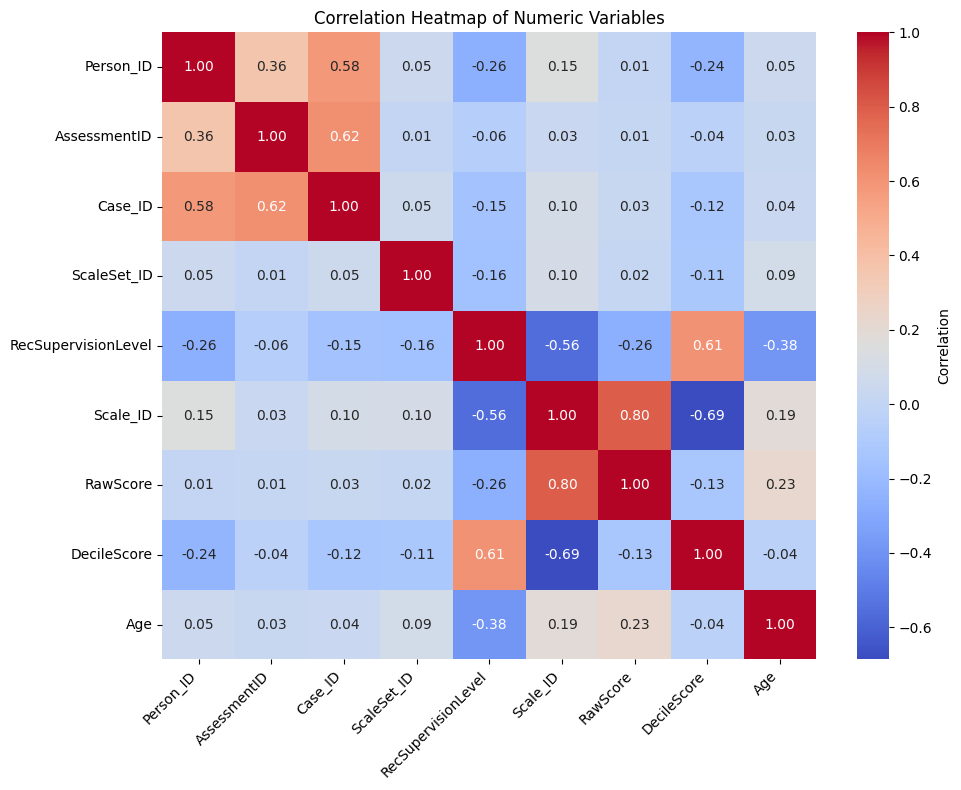

In [7]:
# 1. Load the libraries
import pandas as pd                  # for data handling
import matplotlib.pyplot as plt      # for plotting
import seaborn as sns                # for statistical visualizations

# 2. Read in the filtered CSV
df = pd.read_csv("../data/compas_scores_raw.csv")

# 3. Select only numeric columns
num_df = df.select_dtypes(include="number")

# 4. Compute the correlation matrix
#    Values range from -1 (perfect opposite) to +1 (perfect together), with 0 = no linear link
corr_mat = num_df.corr()

# 5. Draw the heatmap
plt.figure(figsize=(10, 8))          
sns.heatmap(
    corr_mat, 
    annot=True,        # show the correlation numbers in each cell
    fmt=".2f",         # format numbers with two decimal places
    cmap="coolwarm",   # blue-to-red color scale
    cbar_kws={"label": "Correlation"}
)
plt.title("Correlation Heatmap of Numeric Variables")
plt.xticks(rotation=45, ha="right")  # rotate labels so they don’t overlap
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

---

### Correlation Heatmap

We’ll walk through how to read the heatmap you just created. Even if you’ve never worked with data before, this step-by-step guide will clarify exactly what each part of the Python code is doing and what the resulting chart tells you.

#### `plt.figure(figsize=(10, 8))`
- Creates a blank drawing area 10 inches wide by 8 inches tall so your heatmap has room to display all labels and colors clearly.

#### `sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Correlation"})`
- Turns your correlation matrix into a colored grid:
  - **`corr_mat`**: the table of correlation values we computed earlier.
  - **`annot=True`** writes each correlation number in its cell.
  - **`fmt=".2f"`** formats those numbers with two decimal places.
  - **`cmap="coolwarm"`** colors low correlations blue and high correlations red.
  - **`cbar_kws={"label": "Correlation"}`** adds a label to the color legend at the side.

#### `plt.title("Correlation Heatmap of Numeric Variables")`
- Adds a clear **title** so you know you’re looking at a “Correlation Heatmap of Numeric Variables.”

#### `plt.xticks(rotation=45, ha="right")` and `plt.yticks(rotation=0)`
- Rotates the **x-axis** labels 45° and aligns them to the right so they don’t overlap.
- Keeps the **y-axis** labels horizontal for easy reading.

#### `plt.tight_layout()`
- Adjusts padding automatically so labels and plot elements fit without being cut off.

#### `plt.show()`
- Displays the completed chart on your screen.

### Interpreting the chart
- You’ll see a **square grid** with variable names along the top and left edges.
- **Color intensity** shows how strongly each pair of variables moves together:
  - **Bright red** (near +1): strong positive correlation (they rise and fall together).
  - **Bright blue** (near –1): strong negative correlation (one goes up as the other goes down).
  - **Pale or white** (near 0): little or no linear relationship.
- **Numbers** in each cell give the exact correlation coefficient (e.g., `0.82`).
- Use this visual to spot which factors are linked, which move in opposite directions, and whether any pairs are nearly identical—important for deciding what to include in further analysis.  


---

##  Scatterplot Matrix

**What we’re doing**  
Next, we’ll draw a scatterplot matrix—a grid of scatter plots showing each pair of numeric variables. This helps you see the actual data points and spot non-linear patterns or outliers.

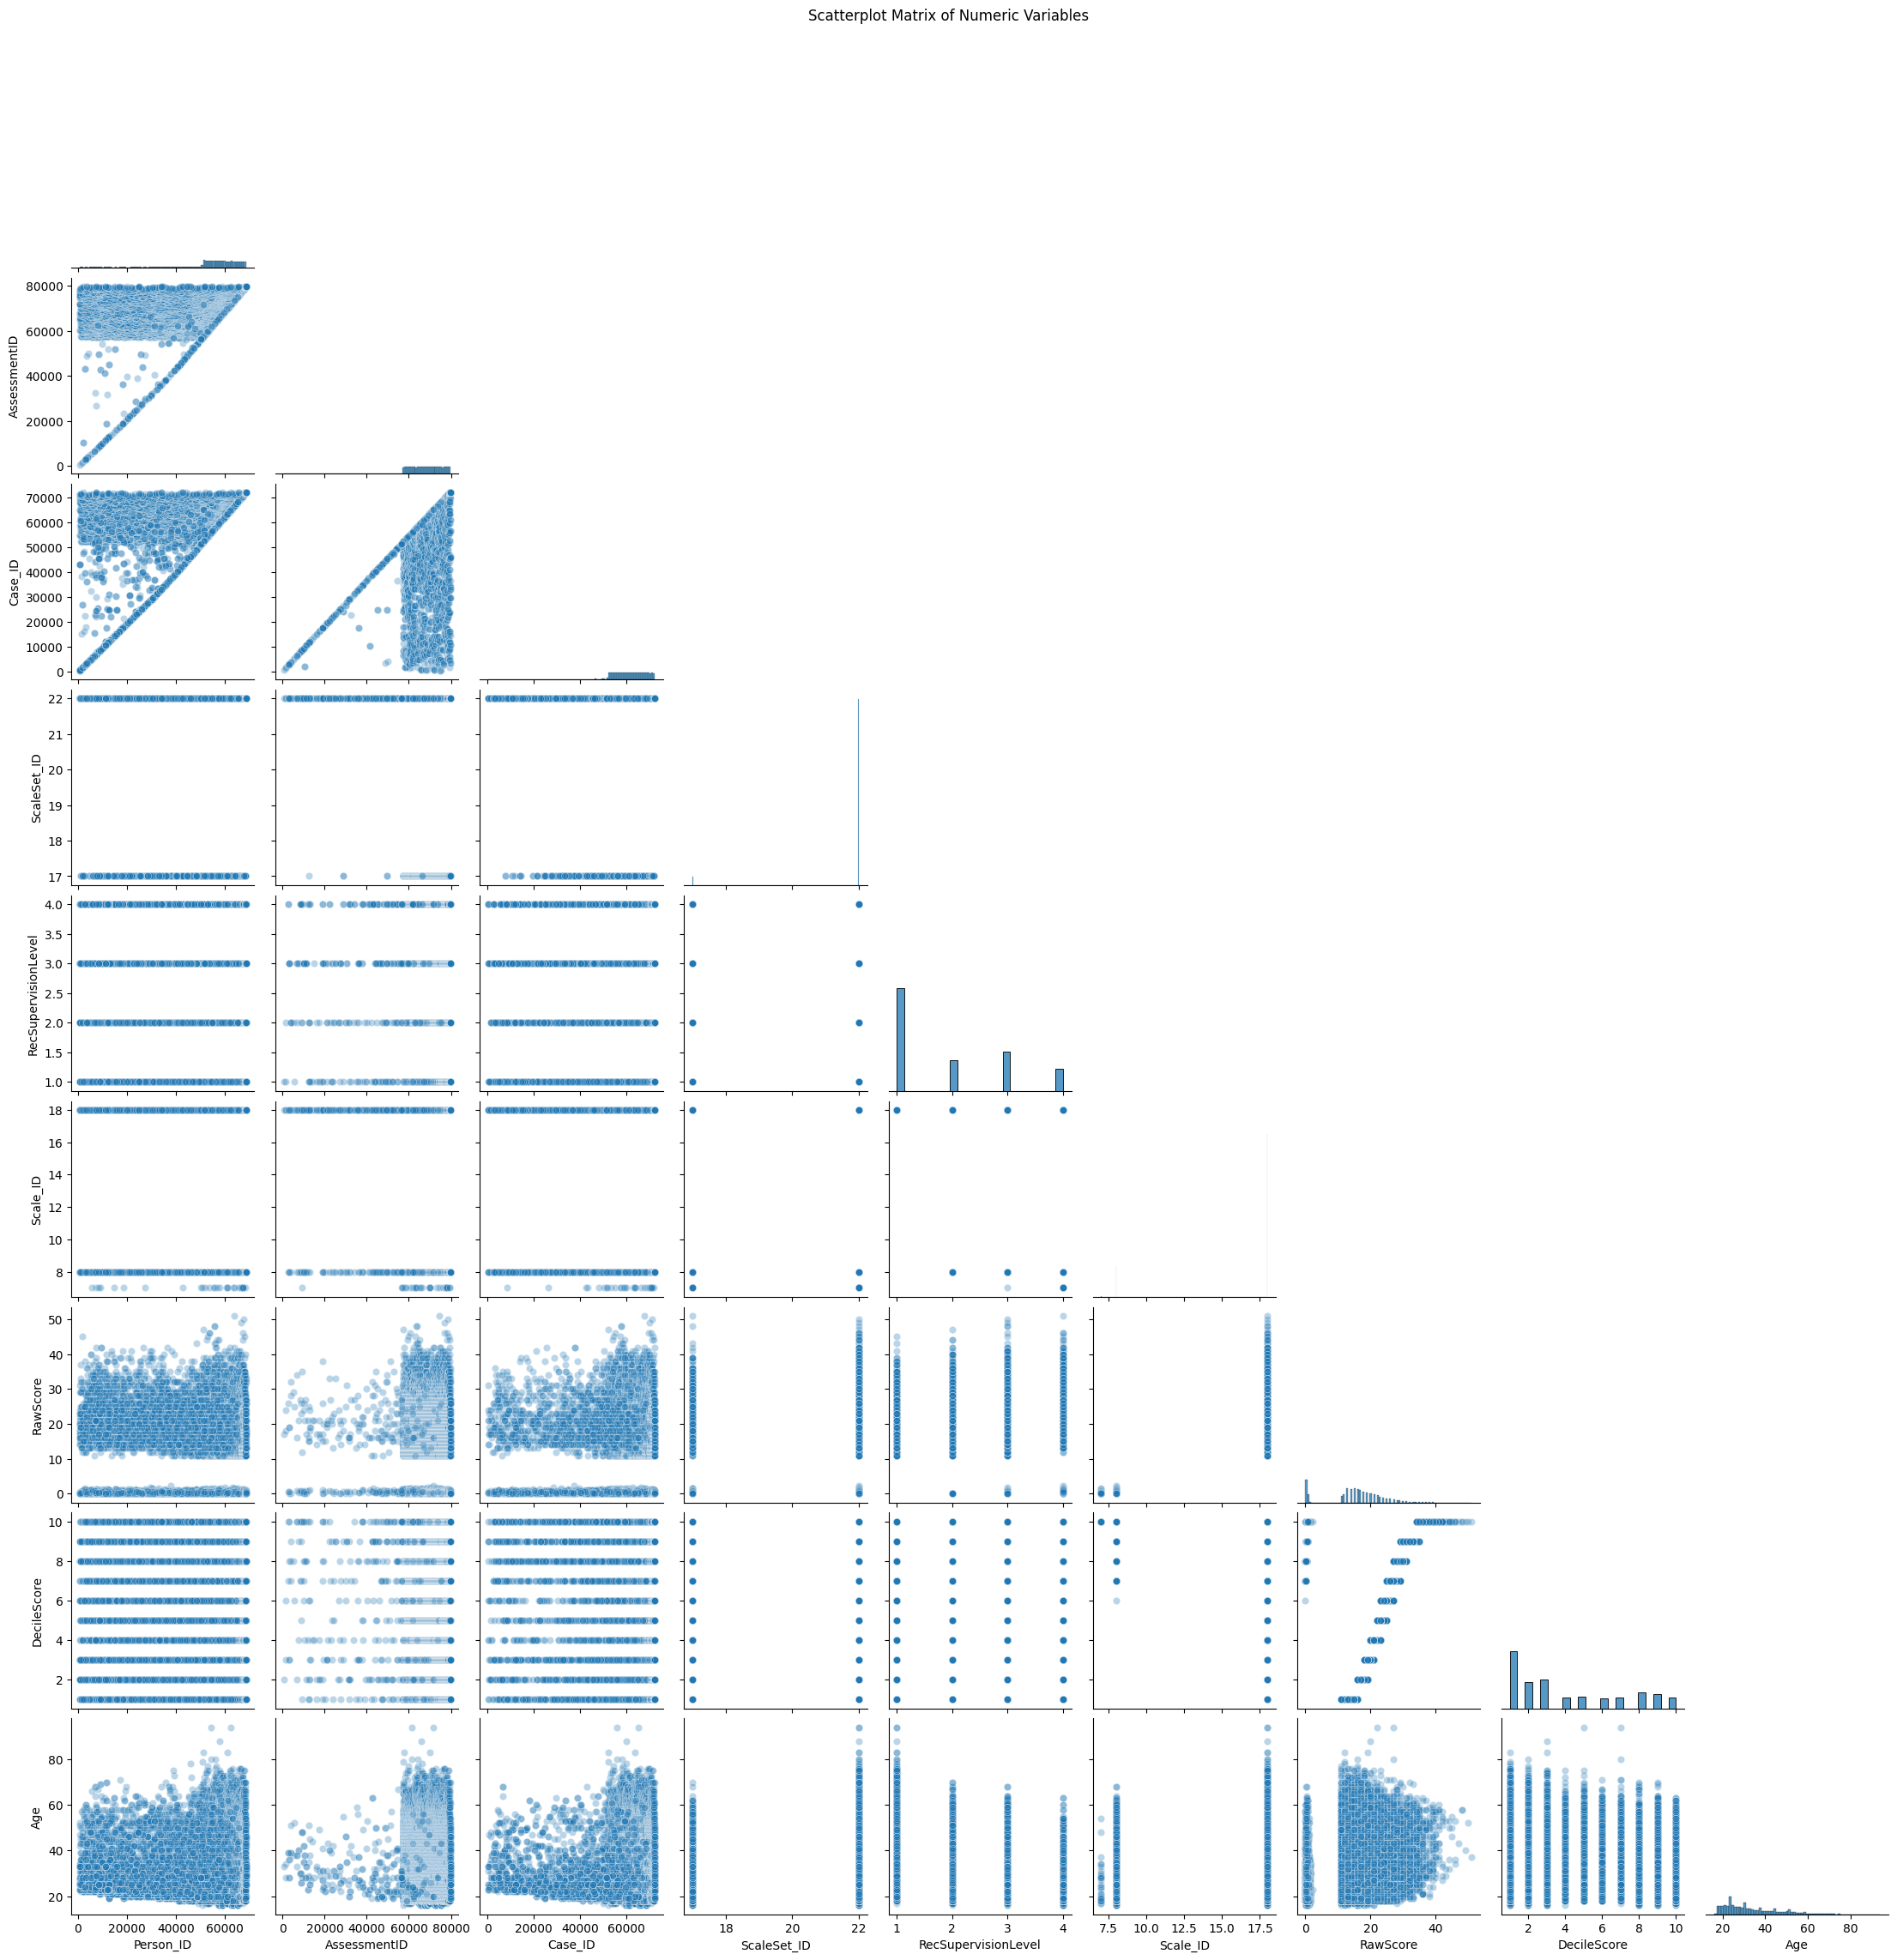

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load your data and numeric subset
df = pd.read_csv("../data/compas_scores_raw.csv")
num_df = df.select_dtypes(include="number")

# 2. Draw the scatterplot matrix
sns.pairplot(
    num_df,
    diag_kind="hist",        # show histograms along the diagonal
    plot_kws={"alpha": 0.3}, # make points semi-transparent
    corner=True              # only lower triangle for clarity
)
plt.suptitle("Scatterplot Matrix of Numeric Variables", y=1.02)
plt.show()

### What you’ll see

- A **grid of small scatter plots**  
  Each cell at row *i*, column *j* plots Variable *i* on the y-axis versus Variable *j* on the x-axis.

- **Diagonal histograms**  
  The diagonal cells show a histogram of each variable’s distribution.

- **Dense clouds**  
  Thick clusters of points mean many similar value pairs.

- **Gaps or tails**  
  Open spaces or extended tails highlight outliers or skew.

- **How to use it**  
  - Look for **straight-line patterns** to identify linked variables.  
  - Notice **random scatter** for variables with no clear relationship.  
  - Spot **isolated points** far from the main cloud to find extreme values.  


---

# 🎉 You’re All Set!

You’ve completed the **Data Visualization** module. You now know how to:

- Create histograms, box plots, scatter plots, and heatmaps  
- Interpret each chart to uncover patterns, outliers, and relationships  
- Use visual tools to guide your next analysis steps  

---

## Next Step: Final Thoughts

Head over to **`06_final_thoughts.ipynb`** to wrap up your **Exploratory Data Analysis** lesson. There, we’ll review key takeaways and discuss best practices for documenting and sharing your insights.  
